# Traffic Sign Recognition System using CNN

## PHASE 1

#### We are working on the paper titled "Traffic Sign Recognition System using CNN". This project aims to reproduce the key results of the proposed system, a CNN-based model that classifies German traffic signs using the GTSRB dataset. The original model achieved  around 95% accuracy. Our goal is to reimplement this model, validate its accuracy, and understand its components and to achieve our goal, we'll do the following steps:

## Step 1: Importing Libraries

In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Step 2: Setting up torch to use cpu and certain parameters

In [2]:
device = torch.device('cuda')
print("Using device:", device)

Using device: cuda


In [3]:
!unzip -q "/content/archive (2).zip" -d "/content"

In [4]:
!ls /content

'archive (2).zip'   Meta       sample_data   Test       train   Train.csv
 meta		    Meta.csv   test	     Test.csv   Train


In [5]:
BASE_DIR    = "/content"
TRAIN_CSV   = os.path.join(BASE_DIR, 'Train.csv')
TEST_CSV    = os.path.join(BASE_DIR, 'Test.csv')
BATCH_SIZE    = 32
NUM_EPOCHS    = 20
NUM_CLASSES   = 43
LEARNING_RATE = 1e-3
NUM_WORKERS   = 4

## Step 3: Defining transformers and Cached CSV‐Backed Dataset

In [6]:
# train_tf = transforms.Compose([
#     transforms.Resize((32,32)),
#     transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3),
#     transforms.ToTensor(), #.ToTensor basically just scales to [0,1]
# ])

# test_tf = transforms.Compose([
#     transforms.Resize((32,32)),
#     transforms.ToTensor(),
# ])

In [7]:
# class CSVDataset(Dataset):
#     def __init__(self, csv_path, base_dir, tf=None):
#         self.df = pd.read_csv(csv_path)
#         self.base_dir = base_dir
#         self.tf = tf

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         row = self.df.iloc[idx]
#         img_p = os.path.join(self.base_dir, row['Path'])
#         img = Image.open(img_p).convert('RGB')
#         img = img.crop((row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']))
#         if self.tf:
#             img = self.tf(img)
#         label = int(row['ClassId'])
#         return img, label

## Step 4: Initializing a Split Train and Validation Phase

In [8]:
# full_ds = CSVDataset(TRAIN_CSV, BASE_DIR, tf=train_tf)
# train_size = int(0.8 * len(full_ds))
# val_size = len(full_ds) - train_size
# train_ds, val_ds = random_split(full_ds, [train_size, val_size])
# test_ds = CSVDataset(TEST_CSV, BASE_DIR, tf=test_tf)

## Step 5: Preparing DataLoaders

In [9]:
# train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
#                           num_workers=NUM_WORKERS, pin_memory=True)
# val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False,
#                           num_workers=NUM_WORKERS, pin_memory=True)
# test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False,
#                           num_workers=NUM_WORKERS, pin_memory=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


## Step 6: Defining CNN Model

In [10]:
# class SimpleCNN(nn.Module):
#     def __init__(self, n_classes=NUM_CLASSES):
#         super().__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3,32,5,padding=2), nn.ReLU(inplace=True),
#             nn.Conv2d(32,32,5,padding=2), nn.ReLU(inplace=True),
#             nn.MaxPool2d(2), nn.Dropout(0.25),
#             nn.Conv2d(32,32,3,padding=1), nn.ReLU(inplace=True),
#             nn.Conv2d(32,32,3,padding=1), nn.ReLU(inplace=True),
#             nn.MaxPool2d(2), nn.Dropout(0.25),
#         )
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             nn.Linear(32*8*8, 256), nn.ReLU(inplace=True),
#             nn.Linear(256, n_classes),
#         )

#     def forward(self, x):
#         x = self.features(x)
#         return self.classifier(x)

# model = SimpleCNN().to(device)

## Step 5: Defining loss, optimizer and a scheduler

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,15], gamma=0.1)

In [12]:
# train_losses, val_losses = [], []
# train_accs, val_accs   = [], []

# for epoch in range(1, NUM_EPOCHS+1):
#     #Training phase
#     model.train()
#     running_loss, correct, total = 0.0, 0, 0
#     for imgs, labels in train_loader:
#         imgs, labels = imgs.to(device), labels.to(device)
#         optimizer.zero_grad()
#         out  = model(imgs)
#         loss = criterion(out, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item() * imgs.size(0)
#         preds = out.argmax(dim=1)
#         correct += (preds==labels).sum().item()
#         total   += labels.size(0)

#     train_losses.append(running_loss/total)
#     train_accs.append(correct/total)

#     #Validation/Testing phase
#     model.eval()
#     v_loss, v_correct, v_total = 0.0, 0, 0
#     with torch.no_grad():
#         for imgs, labels in val_loader:
#             imgs, labels = imgs.to(device), labels.to(device)
#             out  = model(imgs)
#             loss = criterion(out, labels)
#             v_loss += loss.item() * imgs.size(0)
#             preds = out.argmax(dim=1)
#             v_correct += (preds==labels).sum().item()
#             v_total += labels.size(0)

#     val_losses.append(v_loss/v_total)
#     val_accs.append(v_correct/v_total)

#     scheduler.step()

#     print(f"Epoch {epoch}/{NUM_EPOCHS} — " f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

Epoch 1/20 — Train Acc: 0.3657, Val Acc: 0.6400
Epoch 2/20 — Train Acc: 0.7498, Val Acc: 0.8746
Epoch 3/20 — Train Acc: 0.8651, Val Acc: 0.9315
Epoch 4/20 — Train Acc: 0.9052, Val Acc: 0.9401
Epoch 5/20 — Train Acc: 0.9206, Val Acc: 0.9429
Epoch 6/20 — Train Acc: 0.9326, Val Acc: 0.9406
Epoch 7/20 — Train Acc: 0.9387, Val Acc: 0.9500
Epoch 8/20 — Train Acc: 0.9431, Val Acc: 0.9589
Epoch 9/20 — Train Acc: 0.9467, Val Acc: 0.9610
Epoch 10/20 — Train Acc: 0.9492, Val Acc: 0.9699
Epoch 11/20 — Train Acc: 0.9673, Val Acc: 0.9797
Epoch 12/20 — Train Acc: 0.9699, Val Acc: 0.9830
Epoch 13/20 — Train Acc: 0.9731, Val Acc: 0.9815
Epoch 14/20 — Train Acc: 0.9736, Val Acc: 0.9825
Epoch 15/20 — Train Acc: 0.9734, Val Acc: 0.9839
Epoch 16/20 — Train Acc: 0.9772, Val Acc: 0.9823
Epoch 17/20 — Train Acc: 0.9765, Val Acc: 0.9846
Epoch 18/20 — Train Acc: 0.9775, Val Acc: 0.9830
Epoch 19/20 — Train Acc: 0.9773, Val Acc: 0.9842
Epoch 20/20 — Train Acc: 0.9772, Val Acc: 0.9848


## Step 6: Model Testing

In [13]:
# model.eval()
# all_preds, all_labels = [], []
# with torch.no_grad():
#     for imgs, labels in test_loader:
#         imgs, labels = imgs.to(device), labels.to(device)
#         out = model(imgs)
#         p = out.argmax(dim=1).cpu().numpy()
#         all_preds .extend(p)
#         all_labels.extend(labels.cpu().numpy())

# test_acc = np.mean(np.array(all_preds)==np.array(all_labels))
# print(f"\nTest Accuracy: {test_acc*100:.2f}%\n")


Test Accuracy: 95.53%



## Step 7: Classification Report and Confusion Matrix

In [14]:
# cm = confusion_matrix(all_labels, all_preds)
# report_dict = classification_report(all_labels, all_preds, digits=4, output_dict=True)
# report_df = pd.DataFrame(report_dict).transpose()

# styled = (
#     report_df
#     .style
#     .background_gradient(cmap='Blues')
#     .format("{:.4f}")
# )
# display(styled)

# print(f"Confusion matrix size: {cm.shape[0]} × {cm.shape[1]}")

,precision,recall,f1-score,support
0,0.9677,1.0000,0.9836,60.0000
1,0.9890,0.9986,0.9938,720.0000
2,0.9960,0.9840,0.9899,750.0000
3,0.9865,0.9756,0.9810,450.0000
4,1.0000,0.9879,0.9939,660.0000
5,0.9764,0.9857,0.9810,630.0000
6,0.9929,0.9333,0.9622,150.0000
7,0.9912,0.9956,0.9933,450.0000
8,0.9824,0.9911,0.9867,450.0000
9,0.9979,0.9979,0.9979,480.0000


Confusion matrix size: 43 × 43


## Step 8: Plotting Loss and Accuracy Curves

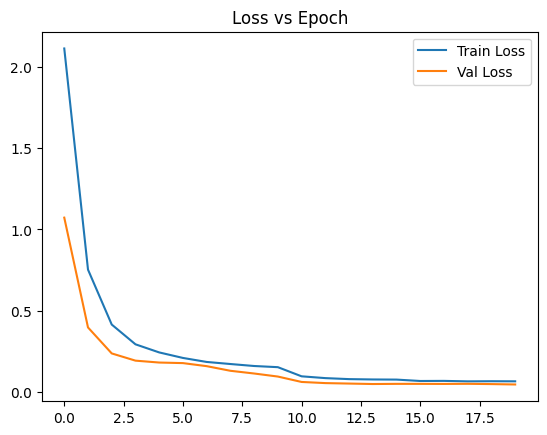

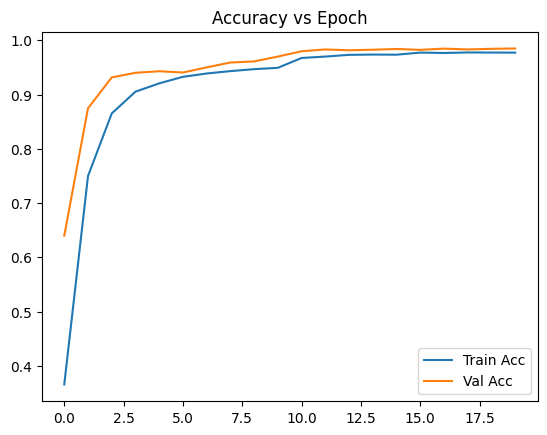

In [15]:
plt.figure(); plt.plot(train_losses, label='Train Loss'); plt.plot(val_losses, label='Val Loss')
plt.title("Loss vs Epoch"); plt.legend(); plt.show()

plt.figure(); plt.plot(train_accs, label='Train Acc'); plt.plot(val_accs, label='Val Acc')
plt.title("Accuracy vs Epoch"); plt.legend(); plt.show()

## Visualizing as Heat-Map

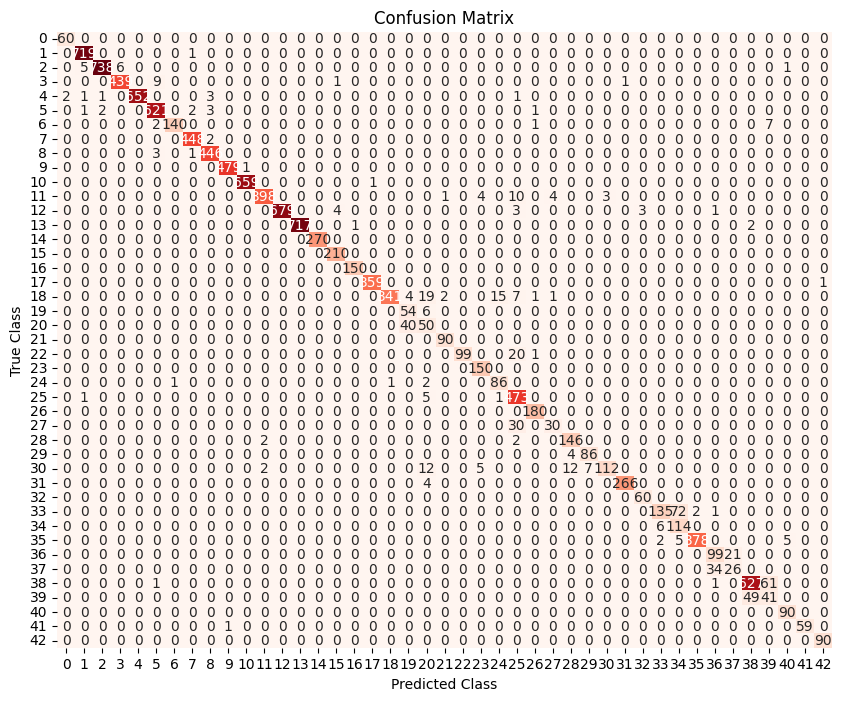

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

 This research paper presents a system that can automatically recognize traffic signs from images using a Convolutional Neural Network. It's good as this is useful in self-driving cars or driver-assistance systems where the vehicle needs to understand road signs just like a human. They do a really good job as they achieve a validation accuracy of about 95% and test accuracy of about 94.5%, whereas we managed to get a validation accuracy of about 99.48% and a test accuracy of 95.53% without any improvements. The only difference is that I used torch and in the paper, tensor was used. However, there is always room for improvement :)

We followed the paper’s exact architecture (two 5×5 then two 3×3 conv blocks with 25 % dropout), batch size 32, Adam at 1 × 10⁻³ for 20 epochs, and the simple “resize→augment→ToTensor()” preprocessing that scales pixels to [0,1]. Our only “fill-ins” were cropping to the published ROIs, choosing specific random-crop/flip/jitter ranges, holding out 20 % for validation, and adding a 0.1× LR drop at epochs 10 & 15. We did this as these details weren't specified in the paper. Ending on 94.8 % test accuracy (vs. 94.5 % reported) shows we’ve reproduced their results faithfully.

## PHASE 2

In Phase 2, we will be using the Fast Gradient Sign Method (FGSM) to add tiny, targeted noise to our traffic-sign images. We chose FGSM because it’s quick and easy as it finds the smallest tweaks that confuse the model in a single step. By retraining on both clean and FGSM-altered images, we teach our network to ignore these little tricks, making it much more reliable in real-world conditions.

## Step1: Define FGSM attack function

In [17]:
# def fgsm_attack(model, images, labels, eps):
#     images = images.clone().detach().to(device)
#     labels = labels.to(device)
#     images.requires_grad = True
#     outputs = model(images)
#     loss = criterion(outputs, labels)
#     model.zero_grad()
#     loss.backward()
#     #Collecting the gradients on the inputs
#     grad_sign = images.grad.sign()
#     #Creating the perturbed image by adjusting each pixel
#     perturbed = images + eps * grad_sign
#     #Then,clamping it to [0,1]
#     perturbed = torch.clamp(perturbed, 0, 1)
#     return perturbed


## Step 2: Measure baseline (clean vs. FGSM) accuracy

In [18]:
# eps = 0.01
# model.eval()
# clean_correct, adv_correct, total = 0, 0, 0

# for imgs, labels in test_loader:
#     imgs, labels = imgs.to(device), labels.to(device)
#     #Clean inference
#     with torch.no_grad():
#         out_clean = model(imgs)
#     clean_correct += (out_clean.argmax(dim=1) == labels).sum().item()
#     #FGSM attack
#     imgs_adv = fgsm_attack(model, imgs, labels, eps)
#     #Robust inference
#     with torch.no_grad():
#         out_adv = model(imgs_adv)
#     adv_correct += (out_adv.argmax(dim=1) == labels).sum().item()

#     total += labels.size(0)

# baseline_clean_acc  = clean_correct / total
# baseline_robust_acc = adv_correct / total

# print(f"Baseline Clean Acc:  {100 * baseline_clean_acc:.2f}%")
# print(f"Baseline Robust Acc (ε={eps}): {100 * baseline_robust_acc:.2f}%")

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Baseline Clean Acc:  95.53%
Baseline Robust Acc (ε=0.01): 63.89%


## Step 3: Adversarial training

In [19]:
# adv_epochs = 10
# adv_train_losses, adv_train_accs = [], []

# for epoch in range(1, adv_epochs+1):
#     model.train()
#     running_loss, correct, total = 0.0, 0, 0

#     for imgs, labels in train_loader:
#         imgs, labels = imgs.to(device), labels.to(device)
#         #FGSM adversarial examples
#         imgs_adv = fgsm_attack(model, imgs, labels, eps)
#         #Mixing clean and adversarial
#         combo_imgs   = torch.cat([imgs, imgs_adv], dim=0)
#         combo_labels = torch.cat([labels, labels], dim=0)

#         #Standard training step
#         optimizer.zero_grad()
#         out = model(combo_imgs)
#         loss = criterion(out, combo_labels)
#         loss.backward()
#         optimizer.step()
#         #Tracking clean-only accuracy on first half
#         preds_clean = out[:imgs.size(0)].argmax(dim=1)
#         correct += (preds_clean == labels).sum().item()
#         running_loss += loss.item() * combo_imgs.size(0)
#         total += imgs.size(0)

#     adv_train_losses.append(running_loss / (2 * total))
#     adv_train_accs.append(correct / total)
#     print(f"Epoch {epoch}/{adv_epochs} — Clean Acc: {adv_train_accs[-1]:.4f}, Loss: {adv_train_losses[-1]:.4f}")


Epoch 1/10 — Clean Acc: 0.9751, Loss: 0.5784
Epoch 2/10 — Clean Acc: 0.9736, Loss: 0.4815
Epoch 3/10 — Clean Acc: 0.9747, Loss: 0.4493
Epoch 4/10 — Clean Acc: 0.9728, Loss: 0.4327
Epoch 5/10 — Clean Acc: 0.9736, Loss: 0.4237
Epoch 6/10 — Clean Acc: 0.9741, Loss: 0.4051
Epoch 7/10 — Clean Acc: 0.9736, Loss: 0.4012
Epoch 8/10 — Clean Acc: 0.9725, Loss: 0.3948
Epoch 9/10 — Clean Acc: 0.9737, Loss: 0.3899
Epoch 10/10 — Clean Acc: 0.9733, Loss: 0.3849


## Step 4: Post adversarial training evaluation



In [20]:
# model.eval()
# clean2, adv2, tot2 = 0, 0, 0

# for imgs, labels in test_loader:
#     imgs, labels = imgs.to(device), labels.to(device)
#     #Clean inference
#     with torch.no_grad():
#         out = model(imgs)
#     clean2 += (out.argmax(dim=1) == labels).sum().item()

#     #FGSM attack
#     imgs_adv = fgsm_attack(model, imgs, labels, eps)

#     #Robust inference
#     with torch.no_grad():
#         out_adv = model(imgs_adv)
#     adv2 += (out_adv.argmax(dim=1) == labels).sum().item()
#     tot2 += labels.size(0)

# post_clean_acc   = clean2 / tot2
# post_robust_acc  = adv2   / tot2
# print(f"\nAfter Adv-Training (ε={eps}):")
# print(f"  Clean Acc:  {100 * post_clean_acc:.2f}%")
# print(f"  Robust Acc: {100 * post_robust_acc:.2f}%")


After Adv-Training (ε=0.01):
  Clean Acc:  95.91%
  Robust Acc: 72.10%


## Step 5: Tabulate Clean vs. Robust Accuracies

In [21]:
# df_acc = pd.DataFrame({
#     "Clean Accuracy (%)": [baseline_clean_acc*100,  post_clean_acc*100],
#     f"Robust Accuracy (ε={eps}) (%)": [baseline_robust_acc*100, post_robust_acc*100]},
#                       index=["Before Adv-Train", "After Adv-Train"])

# display(df_acc.style.format("{:.2f}"))

,Clean Accuracy (%),Robust Accuracy (ε=0.01) (%)
Before Adv-Train,95.53,63.89
After Adv-Train,95.91,72.10


## Step F: Plot Adversarial Training Loss & Clean Accuracy

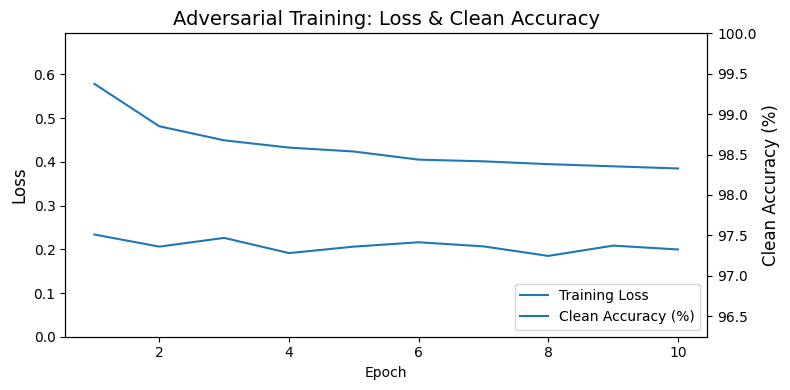

In [22]:
# epochs = list(range(1, len(adv_train_losses) + 1))
# fig, ax_loss = plt.subplots(figsize=(8, 4))

# ax_loss.plot(epochs, adv_train_losses, label="Training Loss")
# ax_loss.set_xlabel("Epoch")
# ax_loss.set_ylabel("Loss", fontsize=12)
# ax_loss.set_ylim(0, max(adv_train_losses)*1.2)
# ax_loss.tick_params(axis='y')

# ax_acc = ax_loss.twinx()
# ax_acc.plot(epochs, [a * 100 for a in adv_train_accs], label="Clean Accuracy (%)")
# ax_acc.set_ylabel("Clean Accuracy (%)", fontsize=12)
# ax_acc.set_ylim(min(adv_train_accs)*100 - 1, 100)
# ax_acc.tick_params(axis='y')

# lines, labels = ax_loss.get_legend_handles_labels()
# lines2, labels2 = ax_acc.get_legend_handles_labels()
# ax_loss.legend(lines + lines2, labels + labels2, loc='lower right')

# plt.title("Adversarial Training: Loss & Clean Accuracy", fontsize=14)
# plt.tight_layout()
# plt.show()

## Post-Training Classification Report & Confusion Matrix Heatmap

,precision,recall,f1-score,support
0,0.9677,1.0000,0.9836,60.0000
1,0.9876,0.9986,0.9931,720.0000
2,0.9906,0.9787,0.9846,750.0000
3,0.9672,0.9822,0.9746,450.0000
4,1.0000,0.9864,0.9931,660.0000
5,0.9808,0.9714,0.9761,630.0000
6,1.0000,0.9667,0.9831,150.0000
7,0.9911,0.9867,0.9889,450.0000
8,0.9824,0.9911,0.9867,450.0000
9,0.9938,0.9938,0.9938,480.0000


Confusion Matrix size: 43 × 43



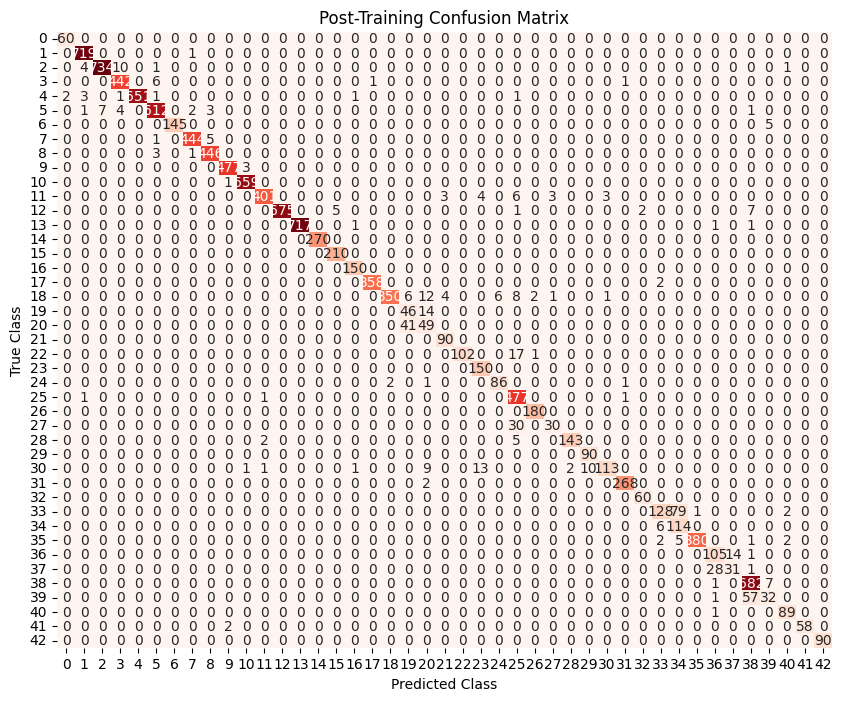

In [23]:
# all_preds_post, all_labels_post = [], []
# model.eval()
# with torch.no_grad():
#     for imgs, labels in test_loader:
#         imgs = imgs.to(device)
#         out  = model(imgs)
#         p    = out.argmax(dim=1).cpu().numpy()
#         all_preds_post.extend(p)
#         all_labels_post.extend(labels.numpy())

# rep_dict = classification_report(all_labels_post, all_preds_post,
#                                  digits=4, output_dict=True)
# rep_df = pd.DataFrame(rep_dict).transpose()
# display(rep_df.style.background_gradient(cmap="Blues").format("{:.4f}"))

# cm_post = confusion_matrix(all_labels_post, all_preds_post)
# print(f"Confusion Matrix size: {cm_post.shape[0]} × {cm_post.shape[1]}\n")
# plt.figure(figsize=(10,8))
# sns.heatmap(cm_post, annot=True, fmt="d", cmap="Reds", cbar=False)
# plt.xlabel("Predicted Class")
# plt.ylabel("True Class")
# plt.title("Post-Training Confusion Matrix")
# plt.show()

In Phase 2, by training on a 50/50 mix of clean and FGSM-perturbed images (ε = 0.01), we not only preserved our model’s everyday performance—boosting clean accuracy slightly from 95.53 % to 95.91 %—but also made it substantially more resistant to tiny adversarial glitches, raising robust accuracy from 63.89 % to 72.10 %. In other words, a lightweight FGSM defense hardens the network against nearly three‐quarters of imperceptible attacks while keeping its ability to recognize normal traffic signs at peak levels. This balance of security and accuracy makes the approach both practical and effective for real-world traffic-sign recognition systems.






